# Graphs for OkCupid database

** Imports **

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df=pd.read_csv('profiles.csv')

** Check the head of df **

In [5]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


** Percentage of drinikng in society  **

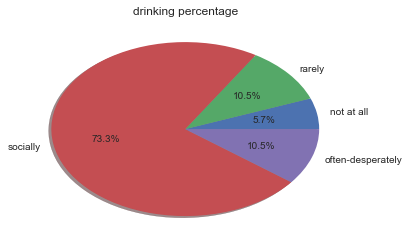

In [6]:
counts=df['drinks'].value_counts()
labels = 'not at all', 'rarely', 'socially', 'often-desperately'
fracs = [counts['not at all'], counts['rarely'], counts['socially'], counts['often']+counts['very often']+counts['desperately']];
fracs[:] = [(x / counts.sum())*100 for x in fracs];
         
fig1, ax1  = plt.subplots();
ax1.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)

ax1.set_title('drinking percentage')                

** Height of men and women in different ages **

In [7]:
def get_range(x):
    if(x<41):
        return '26-40'
    if(x<56):
        return '41-55'
    if(x<61):
        return '56-60'
    else:
        return '61+'

df['age_range'] = df['age'].apply(get_range)

In [8]:
df2=df
df2 = df2[df2['height'] > 21.0] #shortest person is 21 inches

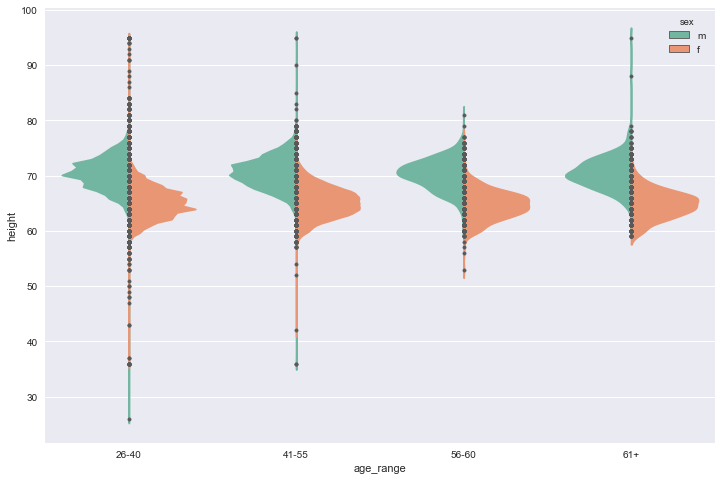

In [9]:
plt.figure(figsize=(12, 8))
ax=sns.violinplot(x='age_range',y="height", hue="sex", data=df2, split=True, palette="Set2",inner="point");
#ax=sns.countplot(x="age_range",data=df)

** Compare straight, gay and bisexual income by age **

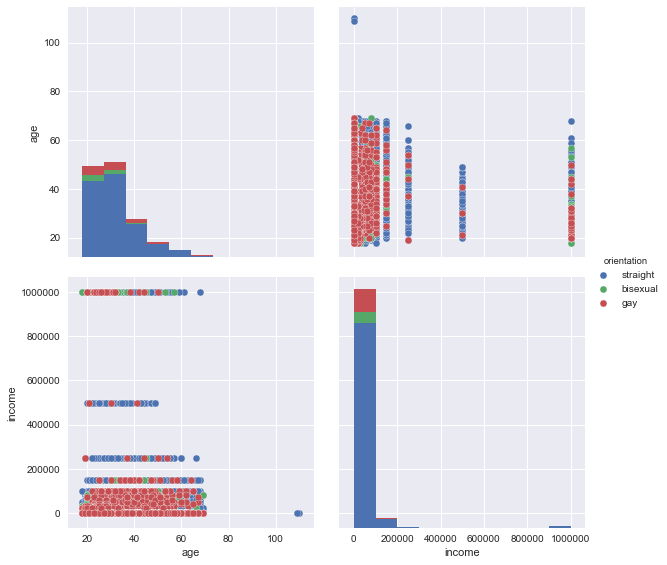

In [15]:
g = sns.pairplot(df, hue="orientation", vars=["age", "income"], size=4)

** Number of people use drugs **

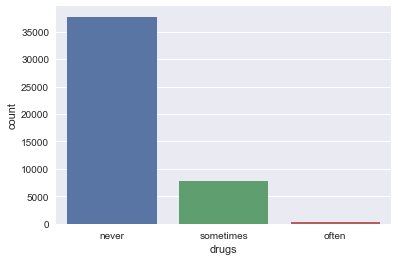

In [75]:
sns.countplot(x="drugs",data=df)

** Age of men vs women with different status **

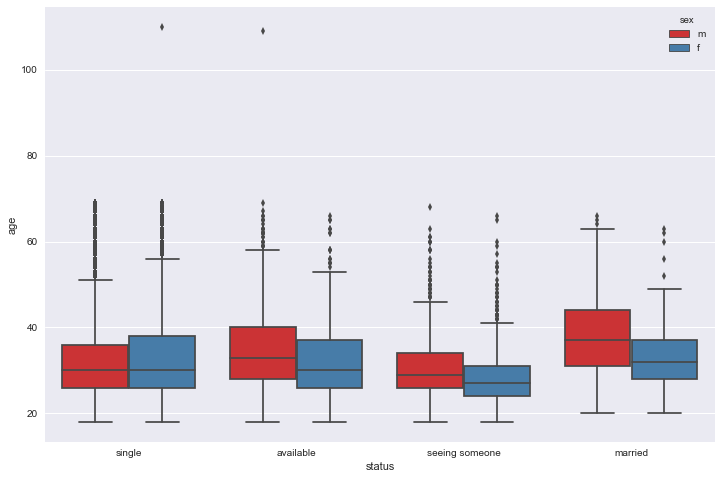

In [21]:
df2 = df2[df2['status'] != 'unknown']

plt.figure(figsize=(12, 8))
ax = sns.boxplot(x="status", y="age", hue="sex",data=df2, palette="Set1")